ENTREGA FINAL - CODERHOUSE - CAMADA 14125 - REVELLO

Objetivo: PREDECIR EL VALOR DE LA CARTERA DADA SEGÚN LA VARIACIÓN DEL VALOR DEL ÍNDICE NASDAQ.

a.- TRABAJO INDIVIDUAL (por renuncia a la camada 14125 de mis 2 ex compañeros)

b.- NO SERIE DE TIEMPO, según lo pedido, ENTONCES VALORO LA CARTERA EN RELACIÓN A LA VALORACIÓN DEL ÍNDICE

c.- Data Acquisition: scrapeando de Yahoo un dataset de 12 años de datos diarios. Cada fila es un día de operaciones bursátiles.

### EMPRESA:
## Esto es una simulación de una relación entre un administrador de fondos de inversión bursátil y yo, en mi calidad de Data Scientist.
## El "Cliente" quiere saber cuál será el valor de su cartera si el índice Nasdaq 100 baja y cuál será si el mismo índice sube. Acordamos hacer una predicción del movimiento de su cartera, en relación al movimiento histórico que ha venido teniendo según su correlación con el índice de referencia. Utilizaremos un algoritmo de regresión.
## Variable TARGET: VALOR de la cartera.
## Moneda: USD
## Composición de la cartera: dada por el cliente (comprende 50% aproximadamente de la cantidad de acciones que componen el índice)
## Índice de referencia: NASDAQ 100
## Ticker del índice: NDX
## Tipo de algoritmos utilizados: Supervisados.
## Algoritmos utilizados: Regresión Lineal, Regresión Múltiple y Regresión Polinómica.

# DATA ACQUISITION

### Importo las librerías necesarias para el proyecto

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

### Determino fecha de inicio y de fin del dataset. Tomo 20 años de cotizaciones diarias. Cada fila es un día.

In [2]:
start= dt.datetime(2011,1,1)
end= dt.datetime(2021,1,1)

### Determino la composición de la cartera y levanto de Yahoo sus cotizaciones, haciendo scrapping.
### Elimino la columna fecha y pongo de index el valor del índice de referencia -NDX-, ya que no es una serie de tiempo.

In [3]:
tickers= ['NDX','AAPL','MSFT','INTC','COST','MDB','KDP','CERN','ADBE','NVDA','NFLX','COST','PEP','PYPL','ADSK','DOCU','FTNT','OKTA','QCOM','VRSN','ZBRA','AKAM','ANSS','CDW']
data = pdr.get_data_yahoo(tickers, start,end) #Traigo el índice de acciones tecnológicas NDAQ 100 y la cartera del cliente.
df= round(data['Adj Close'],2) # que sólo me de ese precio, que es compoleto -no el Close-
df.tail()

Symbols,NDX,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,...,ADSK,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,12711.01,131.16,220.90,45.88,361.82,378.48,31.10,77.49,499.86,129.82,...,301.39,244.93,149.79,275.60,146.10,214.59,376.89,107.46,364.17,128.01
2020-12-28,12838.86,135.85,223.09,45.88,368.25,363.08,31.20,77.13,498.95,128.89,...,299.65,229.20,149.29,262.75,145.07,216.80,382.59,107.28,363.72,129.82
2020-12-29,12843.49,134.04,222.29,48.14,369.90,363.86,31.21,77.58,502.11,129.32,...,298.11,228.16,147.53,261.75,145.80,215.63,378.04,106.71,360.85,128.24
2020-12-30,12845.36,132.90,219.84,47.52,371.61,365.11,31.04,77.07,497.45,131.34,...,299.41,225.90,148.02,260.52,147.24,214.50,383.75,104.65,362.32,128.77
2020-12-31,12888.28,131.88,220.57,48.56,373.93,359.04,31.21,77.56,500.12,130.44,...,305.34,222.30,148.53,254.26,149.58,216.40,384.33,104.99,363.80,130.54


# DATA WRANGLING y EDA

In [4]:
df=df.set_index('NDX')# La entrega NO puede ser una serie de tiempo, quito la columna Date.
df.head()

Symbols,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,NFLX,...,ADSK,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW
NDX,,,,,,,,,,,,,,,,,,,,,
2254.23,10.09,22.06,15.00,54.67,NaN,4.32,23.26,31.29,3.63,25.49,...,39.27,NaN,16.55,NaN,37.36,30.87,38.20,48.26,52.57,NaN
2251.46,10.14,22.15,15.22,54.56,NaN,4.33,22.89,31.51,3.62,25.91,...,38.53,NaN,17.49,NaN,37.95,30.68,37.84,47.14,52.34,NaN
2270.40,10.23,22.08,15.07,53.55,NaN,4.42,22.91,32.22,3.90,25.68,...,41.24,NaN,18.25,NaN,38.74,30.95,37.80,48.85,53.20,NaN
2277.51,10.22,22.72,14.95,53.30,NaN,4.46,22.95,32.27,4.44,25.43,...,41.26,NaN,18.19,NaN,39.22,31.20,37.48,48.45,53.27,NaN
2276.70,10.29,22.55,14.87,53.30,NaN,4.32,23.01,32.04,4.56,25.61,...,40.76,NaN,17.61,NaN,38.52,30.81,37.60,48.69,52.45,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2517 entries, 2254.23 to 12888.28
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
 2   INTC    2517 non-null   float64
 3   COST    2517 non-null   float64
 4   MDB     806 non-null    float64
 5   KDP     2517 non-null   float64
 6   CERN    2517 non-null   float64
 7   ADBE    2517 non-null   float64
 8   NVDA    2517 non-null   float64
 9   NFLX    2517 non-null   float64
 10  PEP     2517 non-null   float64
 11  PYPL    1385 non-null   float64
 12  ADSK    2517 non-null   float64
 13  DOCU    676 non-null    float64
 14  FTNT    2517 non-null   float64
 15  OKTA    941 non-null    float64
 16  QCOM    2517 non-null   float64
 17  VRSN    2517 non-null   float64
 18  ZBRA    2517 non-null   float64
 19  AKAM    2517 non-null   float64
 20  ANSS    2517 non-null   float64
 21  CDW     1893 non-null   f

In [6]:
df.shape

(2517, 22)

In [7]:
len(df.index)

2517

In [8]:
df.columns

Index(['AAPL', 'MSFT', 'INTC', 'COST', 'MDB', 'KDP', 'CERN', 'ADBE', 'NVDA',
       'NFLX', 'PEP', 'PYPL', 'ADSK', 'DOCU', 'FTNT', 'OKTA', 'QCOM', 'VRSN',
       'ZBRA', 'AKAM', 'ANSS', 'CDW'],
      dtype='object', name='Symbols')

In [9]:
df.dtypes

Symbols
AAPL    float64
MSFT    float64
INTC    float64
COST    float64
MDB     float64
KDP     float64
CERN    float64
ADBE    float64
NVDA    float64
NFLX    float64
PEP     float64
PYPL    float64
ADSK    float64
DOCU    float64
FTNT    float64
OKTA    float64
QCOM    float64
VRSN    float64
ZBRA    float64
AKAM    float64
ANSS    float64
CDW     float64
dtype: object

In [10]:
# Acá vemos que las columnas tienen diferentes cantidades de non-null
# Esto se debe a que algunas acciones comenzaron a cotizar en bolsa con posterioridad al 'start' que uso para los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2517 entries, 2254.23 to 12888.28
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
 2   INTC    2517 non-null   float64
 3   COST    2517 non-null   float64
 4   MDB     806 non-null    float64
 5   KDP     2517 non-null   float64
 6   CERN    2517 non-null   float64
 7   ADBE    2517 non-null   float64
 8   NVDA    2517 non-null   float64
 9   NFLX    2517 non-null   float64
 10  PEP     2517 non-null   float64
 11  PYPL    1385 non-null   float64
 12  ADSK    2517 non-null   float64
 13  DOCU    676 non-null    float64
 14  FTNT    2517 non-null   float64
 15  OKTA    941 non-null    float64
 16  QCOM    2517 non-null   float64
 17  VRSN    2517 non-null   float64
 18  ZBRA    2517 non-null   float64
 19  AKAM    2517 non-null   float64
 20  ANSS    2517 non-null   float64
 21  CDW     1893 non-null   f

In [11]:
df.isnull().sum()

Symbols
AAPL       0
MSFT       0
INTC       0
COST       0
MDB     1711
KDP        0
CERN       0
ADBE       0
NVDA       0
NFLX       0
PEP        0
PYPL    1132
ADSK       0
DOCU    1841
FTNT       0
OKTA    1576
QCOM       0
VRSN       0
ZBRA       0
AKAM       0
ANSS       0
CDW      624
dtype: int64

In [12]:
df.count()

Symbols
AAPL    2517
MSFT    2517
INTC    2517
COST    2517
MDB      806
KDP     2517
CERN    2517
ADBE    2517
NVDA    2517
NFLX    2517
PEP     2517
PYPL    1385
ADSK    2517
DOCU     676
FTNT    2517
OKTA     941
QCOM    2517
VRSN    2517
ZBRA    2517
AKAM    2517
ANSS    2517
CDW     1893
dtype: int64

In [13]:
# Ante el inicio de cotizaciones posteriores a la fecha de start, en 4 empresas, debo resolver cómo completar la info.
# En los 4 casos es información inexistente -no faltante y subsanable-
# Si pusiera un promedio para reemplazar los NaN, las cotizaciones iniciales serían mucho más altas y las finales mucho más bajas.
# Resuelvo completar con la misma cotización de inicio de cada acción -de manera de mantener neutra su influencia en el estudio-
df['MDB']=df['MDB'].replace(np.nan,32.07)
df['PYPL']=df['PYPL'].replace(np.nan,36.71)
df['DOCU']=df['DOCU'].replace(np.nan,39.73)
df['OKTA']=df['OKTA'].replace(np.nan,23.51)
df['CDW']=df['CDW'].replace(np.nan,16.94)


In [14]:
# Al pintar la fila de inicio compruebo que ya no tengo NaN por períodos anteriores a la cotización de cada acción.
df.iloc[0]

Symbols
AAPL    10.09
MSFT    22.06
INTC    15.00
COST    54.67
MDB     32.07
KDP      4.32
CERN    23.26
ADBE    31.29
NVDA     3.63
NFLX    25.49
PEP     47.60
PYPL    36.71
ADSK    39.27
DOCU    39.73
FTNT    16.55
OKTA    23.51
QCOM    37.36
VRSN    30.87
ZBRA    38.20
AKAM    48.26
ANSS    52.57
CDW     16.94
Name: 2254.23, dtype: float64

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
# Composición % de la cartera
portfolio= [.0208,.0461,.0276,.0688,.0718,.0249,.0212,.0887,.0366,.0938,.0225,.0318,.0436,.0390,.0455,.0351,.0187,.0313,.0811,.0291,.0532,.0262] # los % de inversión en cada acción

In [17]:
np.sum(portfolio)

0.9574

In [18]:
# Multiplico el capital por el portfolio por el % de cada acción, obtengo la cartera
# Car= cartera
Car= round((df/df.iloc[0])*portfolio*100000,2)
Car

Symbols,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,NFLX,...,ADSK,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW
NDX,,,,,,,,,,,,,,,,,,,,,
2254.23,2080.00,4610.00,2760.00,6880.00,7180.00,2490.00,2120.00,8870.00,3660.00,9380.00,...,4360.00,3900.00,4550.00,3510.00,1870.00,3130.00,8110.00,2910.00,5320.00,2620.00
2251.46,2090.31,4628.81,2800.48,6866.16,7180.00,2495.76,2086.28,8932.36,3649.92,9534.55,...,4277.84,3900.00,4808.43,3510.00,1899.53,3110.74,8033.57,2842.47,5296.72,2620.00
2270.40,2108.86,4614.18,2772.88,6739.05,7180.00,2547.64,2088.10,9133.63,3932.23,9449.92,...,4578.72,3900.00,5017.37,3510.00,1939.07,3138.11,8025.08,2945.58,5383.75,2620.00
2277.51,2106.80,4747.92,2750.80,6707.59,7180.00,2570.69,2091.75,9147.81,4476.69,9357.92,...,4580.94,3900.00,5000.88,3510.00,1963.10,3163.46,7957.14,2921.46,5390.84,2620.00
2276.70,2121.23,4712.40,2736.08,6707.59,7180.00,2490.00,2097.21,9082.61,4597.69,9424.16,...,4525.43,3900.00,4841.42,3510.00,1928.06,3123.92,7982.62,2935.93,5307.86,2620.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711.01,27037.94,46162.69,8441.92,45533.59,84736.09,17925.69,7062.72,141698.89,130892.89,189134.51,...,33462.20,24042.97,41180.94,41146.58,7312.82,21757.91,80015.13,6479.66,36853.42,19798.48
12838.86,28004.76,46620.35,8441.92,46342.78,81288.26,17983.33,7029.91,141440.92,129955.21,191029.64,...,33269.01,22498.87,41043.47,39228.09,7261.27,21981.99,81225.26,6468.81,36807.88,20078.42
12843.49,27631.64,46453.17,8857.76,46550.43,81462.89,17989.10,7070.92,142336.71,130388.76,195353.50,...,33098.03,22396.78,40559.61,39078.80,7297.81,21863.36,80259.28,6434.44,36517.44,19834.05


In [19]:
round(Car.iloc[0].sum(),2) #Al haber sólo una acción de cada empresa, el total invertido al precio del momento de la inversión es este.
# El resto del dinero hasta llegar a usd 100mil queda cash y no se usa en esta cartera.

95740.0

In [20]:
Car.iloc[0] #A este momento 0 es que se realizó la inversión de los USD 95.740.-

Symbols
AAPL    2080.0
MSFT    4610.0
INTC    2760.0
COST    6880.0
MDB     7180.0
KDP     2490.0
CERN    2120.0
ADBE    8870.0
NVDA    3660.0
NFLX    9380.0
PEP     2250.0
PYPL    3180.0
ADSK    4360.0
DOCU    3900.0
FTNT    4550.0
OKTA    3510.0
QCOM    1870.0
VRSN    3130.0
ZBRA    8110.0
AKAM    2910.0
ANSS    5320.0
CDW     2620.0
Name: 2254.23, dtype: float64

In [21]:
Car.describe()

Symbols,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,NFLX,...,ADSK,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,...,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,7075.442908,14318.277882,5779.227271,19056.679571,13861.715276,7835.197251,4945.308760,40573.039142,27314.649404,58438.330457,...,9959.050620,5321.381152,12899.497656,7621.643719,2852.694660,9698.665999,22731.510155,3626.905852,12549.248749,8018.564783
std,5126.616636,11070.860000,2381.102694,10060.043120,13561.013828,4664.499591,1215.232825,35153.428833,32522.465418,54505.438991,...,6825.773842,4021.992871,9047.934172,8076.072038,935.513756,6012.306960,16243.542336,1286.347217,7438.112252,5615.969638
min,1991.360000,3955.910000,2601.760000,6640.890000,5767.280000,2374.720000,2086.280000,6432.100000,2631.570000,2829.820000,...,2599.120000,3672.260000,4467.520000,3277.090000,1741.360000,2790.330000,6074.010000,1124.560000,4653.100000,2609.170000
25%,3558.060000,5840.870000,3634.000000,11722.550000,7180.000000,3527.500000,4248.200000,12969.080000,3740.660000,13862.090000,...,4607.590000,3900.000000,6430.480000,3510.000000,2311.470000,4869.900000,9787.200000,2727.900000,7613.160000,2734.450000
50%,5380.380000,9811.400000,5227.440000,16763.940000,7180.000000,7245.210000,5151.440000,25266.320000,7672.890000,35871.420000,...,6530.560000,3900.000000,9193.470000,3510.000000,2603.780000,7753.520000,16691.310000,3526.850000,9114.940000,5920.520000
75%,8740.540000,20306.150000,8018.720000,24523.610000,12589.070000,10599.790000,5912.480000,67572.450000,45160.170000,107294.100000,...,14786.470000,4108.100000,17798.610000,7851.590000,2988.700000,14185.890000,32374.190000,4384.900000,16378.960000,12051.380000
max,28004.760000,47880.470000,11982.080000,48404.140000,88658.560000,17989.100000,7148.390000,151320.100000,146652.070000,204803.410000,...,33900.750000,26386.110000,41829.760000,42639.560000,7804.850000,22411.900000,81594.670000,7209.880000,36853.420000,21985.420000


In [22]:
Car.describe().T

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,2517.0,7075.442908,5126.616636,1991.36,3558.06,5380.38,8740.54,28004.76
MSFT,2517.0,14318.277882,11070.860000,3955.91,5840.87,9811.40,20306.15,47880.47
INTC,2517.0,5779.227271,2381.102694,2601.76,3634.00,5227.44,8018.72,11982.08
COST,2517.0,19056.679571,10060.043120,6640.89,11722.55,16763.94,24523.61,48404.14
MDB,2517.0,13861.715276,13561.013828,5767.28,7180.00,7180.00,12589.07,88658.56
KDP,2517.0,7835.197251,4664.499591,2374.72,3527.50,7245.21,10599.79,17989.10
CERN,2517.0,4945.308760,1215.232825,2086.28,4248.20,5151.44,5912.48,7148.39
ADBE,2517.0,40573.039142,35153.428833,6432.10,12969.08,25266.32,67572.45,151320.10
NVDA,2517.0,27314.649404,32522.465418,2631.57,3740.66,7672.89,45160.17,146652.07


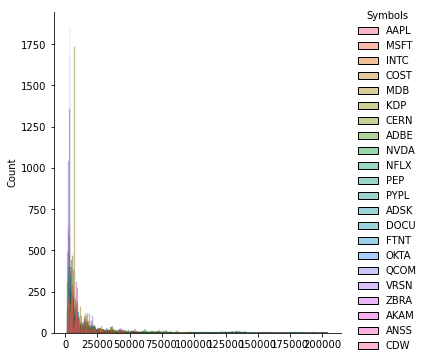

In [23]:
sns.displot(Car);

## Creo la columna cartera

In [24]:
Car['Cartera']=Car.sum(axis=1)
Car

Symbols,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,NFLX,...,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW,Cartera
NDX,,,,,,,,,,,,,,,,,,,,,
2254.23,2080.00,4610.00,2760.00,6880.00,7180.00,2490.00,2120.00,8870.00,3660.00,9380.00,...,3900.00,4550.00,3510.00,1870.00,3130.00,8110.00,2910.00,5320.00,2620.00,95740.00
2251.46,2090.31,4628.81,2800.48,6866.16,7180.00,2495.76,2086.28,8932.36,3649.92,9534.55,...,3900.00,4808.43,3510.00,1899.53,3110.74,8033.57,2842.47,5296.72,2620.00,95982.11
2270.40,2108.86,4614.18,2772.88,6739.05,7180.00,2547.64,2088.10,9133.63,3932.23,9449.92,...,3900.00,5017.37,3510.00,1939.07,3138.11,8025.08,2945.58,5383.75,2620.00,97083.00
2277.51,2106.80,4747.92,2750.80,6707.59,7180.00,2570.69,2091.75,9147.81,4476.69,9357.92,...,3900.00,5000.88,3510.00,1963.10,3163.46,7957.14,2921.46,5390.84,2620.00,97613.13
2276.70,2121.23,4712.40,2736.08,6707.59,7180.00,2490.00,2097.21,9082.61,4597.69,9424.16,...,3900.00,4841.42,3510.00,1928.06,3123.92,7982.62,2935.93,5307.86,2620.00,97275.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12711.01,27037.94,46162.69,8441.92,45533.59,84736.09,17925.69,7062.72,141698.89,130892.89,189134.51,...,24042.97,41180.94,41146.58,7312.82,21757.91,80015.13,6479.66,36853.42,19798.48,1038011.29
12838.86,28004.76,46620.35,8441.92,46342.78,81288.26,17983.33,7029.91,141440.92,129955.21,191029.64,...,22498.87,41043.47,39228.09,7261.27,21981.99,81225.26,6468.81,36807.88,20078.42,1035167.40
12843.49,27631.64,46453.17,8857.76,46550.43,81462.89,17989.10,7070.92,142336.71,130388.76,195353.50,...,22396.78,40559.61,39078.80,7297.81,21863.36,80259.28,6434.44,36517.44,19834.05,1038218.23


### Ya tengo limpio el dataset, lo bajo a un archivo.

In [25]:
Car.to_csv("CarteraCoderFinal.csv")

In [26]:
# Reseteo el index para que en la corr() aparezca el índice y su relación con cada elemento de la cartera.
CarT= Car.reset_index()
CarT

Symbols,NDX,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,...,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW,Cartera
0,2254.23,2080.00,4610.00,2760.00,6880.00,7180.00,2490.00,2120.00,8870.00,3660.00,...,3900.00,4550.00,3510.00,1870.00,3130.00,8110.00,2910.00,5320.00,2620.00,95740.00
1,2251.46,2090.31,4628.81,2800.48,6866.16,7180.00,2495.76,2086.28,8932.36,3649.92,...,3900.00,4808.43,3510.00,1899.53,3110.74,8033.57,2842.47,5296.72,2620.00,95982.11
2,2270.40,2108.86,4614.18,2772.88,6739.05,7180.00,2547.64,2088.10,9133.63,3932.23,...,3900.00,5017.37,3510.00,1939.07,3138.11,8025.08,2945.58,5383.75,2620.00,97083.00
3,2277.51,2106.80,4747.92,2750.80,6707.59,7180.00,2570.69,2091.75,9147.81,4476.69,...,3900.00,5000.88,3510.00,1963.10,3163.46,7957.14,2921.46,5390.84,2620.00,97613.13
4,2276.70,2121.23,4712.40,2736.08,6707.59,7180.00,2490.00,2097.21,9082.61,4597.69,...,3900.00,4841.42,3510.00,1928.06,3123.92,7982.62,2935.93,5307.86,2620.00,97275.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,12711.01,27037.94,46162.69,8441.92,45533.59,84736.09,17925.69,7062.72,141698.89,130892.89,...,24042.97,41180.94,41146.58,7312.82,21757.91,80015.13,6479.66,36853.42,19798.48,1038011.29
2513,12838.86,28004.76,46620.35,8441.92,46342.78,81288.26,17983.33,7029.91,141440.92,129955.21,...,22498.87,41043.47,39228.09,7261.27,21981.99,81225.26,6468.81,36807.88,20078.42,1035167.40
2514,12843.49,27631.64,46453.17,8857.76,46550.43,81462.89,17989.10,7070.92,142336.71,130388.76,...,22396.78,40559.61,39078.80,7297.81,21863.36,80259.28,6434.44,36517.44,19834.05,1038218.23
2515,12845.36,27396.63,45941.18,8743.68,46765.63,81742.74,17891.11,7024.44,141015.71,132425.45,...,22174.93,40694.32,38895.16,7369.88,21748.79,81471.53,6310.23,36666.21,19916.02,1037298.66


### Tabla y gráfico del Coeficiente de Correlación de Pearson

In [27]:
CarT.corr()

Symbols,NDX,AAPL,MSFT,INTC,COST,MDB,KDP,CERN,ADBE,NVDA,...,DOCU,FTNT,OKTA,QCOM,VRSN,ZBRA,AKAM,ANSS,CDW,Cartera
Symbols,,,,,,,,,,,,,,,,,,,,,
NDX,1.000000,0.964676,0.978431,0.923009,0.981566,0.857054,0.947900,0.773887,0.984930,0.947242,...,0.760202,0.941897,0.875843,0.812035,0.949369,0.966073,0.905645,0.974591,0.958004,0.984893
AAPL,0.964676,1.000000,0.969296,0.829364,0.946562,0.911941,0.871850,0.678415,0.965681,0.957777,...,0.882481,0.941174,0.932953,0.887637,0.880837,0.949885,0.867211,0.972334,0.896859,0.969265
MSFT,0.978431,0.969296,1.000000,0.906049,0.981494,0.918939,0.943187,0.678951,0.993732,0.940939,...,0.803877,0.973368,0.938934,0.827443,0.958400,0.970541,0.883727,0.991916,0.958728,0.993231
INTC,0.923009,0.829364,0.906049,1.000000,0.920506,0.717273,0.944062,0.734475,0.912369,0.829137,...,0.525430,0.891731,0.735966,0.613557,0.943250,0.893695,0.854091,0.892009,0.949424,0.906984
COST,0.981566,0.946562,0.981494,0.920506,1.000000,0.878512,0.966343,0.759055,0.977350,0.904699,...,0.735451,0.950163,0.892999,0.804611,0.968776,0.966133,0.909026,0.975282,0.971652,0.976232
MDB,0.857054,0.911941,0.918939,0.717273,0.878512,1.000000,0.820038,0.506101,0.901264,0.838057,...,0.881654,0.918040,0.988962,0.878843,0.845487,0.912287,0.778005,0.917073,0.831936,0.909859
KDP,0.947900,0.871850,0.943187,0.944062,0.966343,0.820038,1.000000,0.723549,0.948248,0.840056,...,0.611587,0.931163,0.825476,0.685436,0.984249,0.940491,0.868588,0.923422,0.974386,0.944875
CERN,0.773887,0.678415,0.678951,0.734475,0.759055,0.506101,0.723549,1.000000,0.683404,0.601809,...,0.409028,0.634216,0.519551,0.589698,0.709861,0.700489,0.800634,0.687766,0.715023,0.678395
ADBE,0.984930,0.965681,0.993732,0.912369,0.977350,0.901264,0.948248,0.683404,1.000000,0.954965,...,0.790158,0.968190,0.921789,0.812116,0.960653,0.971099,0.880653,0.988890,0.958372,0.998353


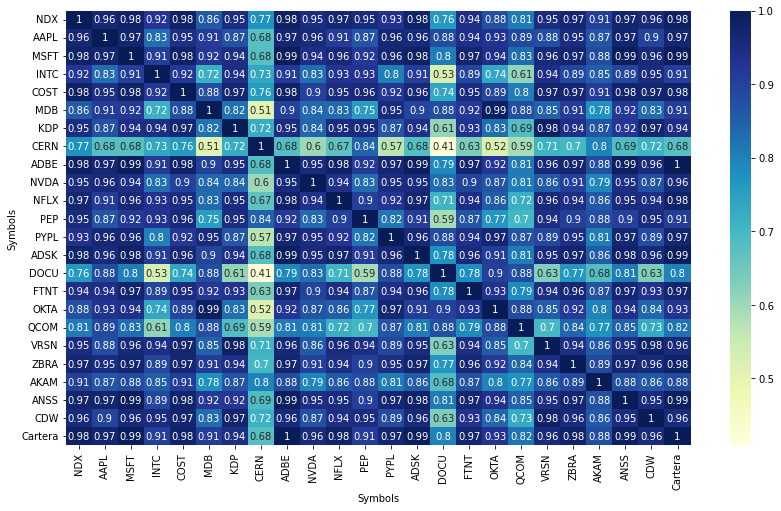

In [28]:
plt.figure(figsize=(14, 8))

Carc = CarT.corr()
sns.heatmap(Carc, 
            xticklabels = Carc.columns.values,
            yticklabels = Carc.columns.values,
            annot = True, cmap="YlGnBu");

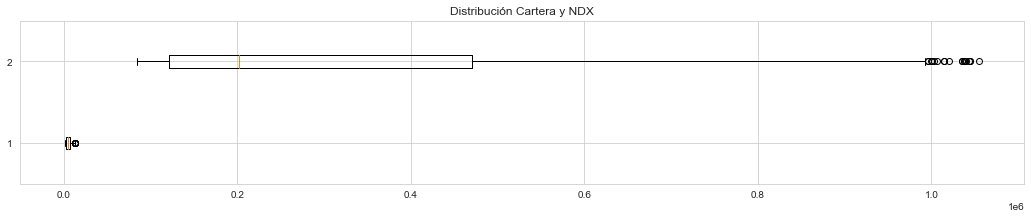

In [29]:
plt.figure(figsize=(18,3))
sns.set_style('whitegrid')
dat1=CarT['NDX']
dat2=CarT['Cartera']
data_t=[dat1,dat2]
plt.boxplot(data_t, vert=False)
plt.title("Distribución Cartera y NDX")
plt.show()

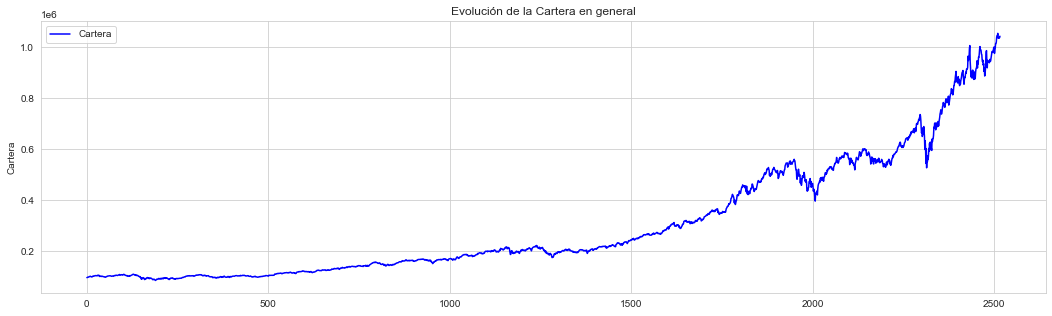

In [30]:
y=Car['Cartera']
yn=CarT['NDX']
x=CarT.index

plt.figure(figsize=(18,5))

plt.plot(x,y,color='blue',linestyle='-',label='Cartera')
#plt.plot(x,yn,color='red',linestyle='-',label='NDX')

plt.legend()
plt.title("Evolución de la Cartera en general")
#plt.xlabel("")
plt.ylabel("Cartera")
#plt.xlim([14000,16000])
#plt.ylim([0.8,1.4])
#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

Text(0.5, 1.0, 'Evolución de la Cartera en relación al NDX')

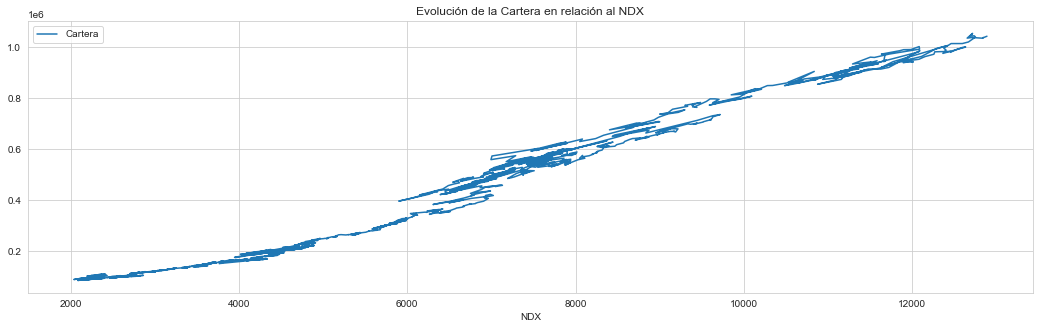

In [31]:
plt.figure(figsize=(18,5))
Car['Cartera'].plot()

plt.legend()
plt.title("Evolución de la Cartera en relación al NDX")

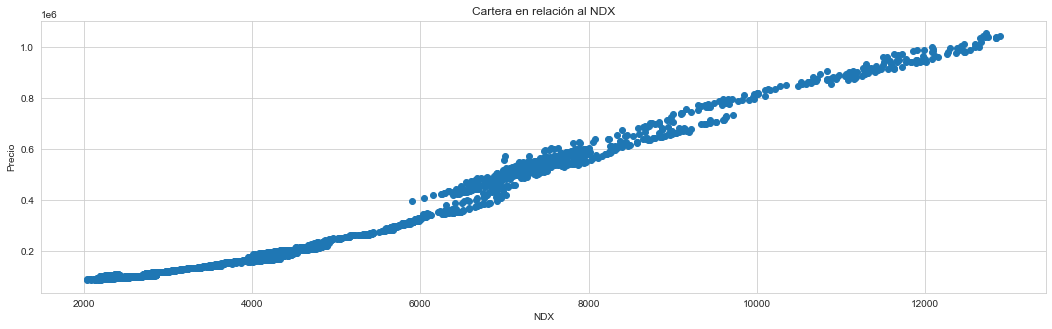

In [32]:
plt.figure(figsize=(18,5))

plt.scatter(CarT['NDX'],Car['Cartera'],label='Cartera')
#plt.scatter(Cartera['NDX'].iloc[2500:],Cartera['EMA_50'].iloc[2500:],label='EMA_50',linestyle='--',color='black',linewidth=2.0)

#plt.legend()
plt.title("Cartera en relación al NDX")
plt.xlabel("NDX")
plt.ylabel("Precio")
#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

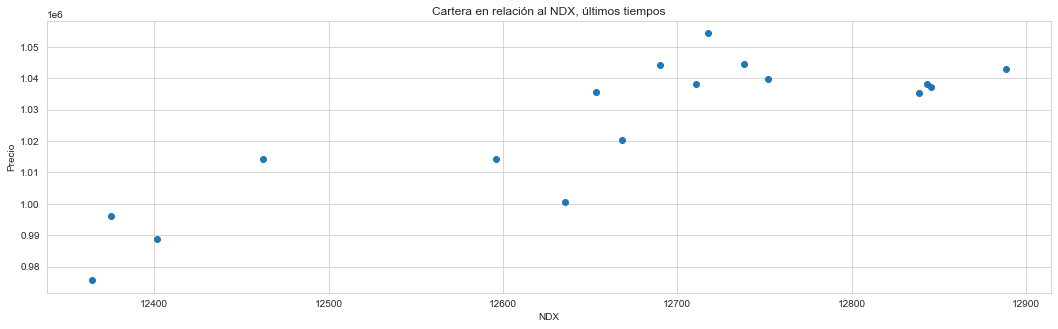

In [33]:
plt.figure(figsize=(18,5))

plt.scatter(CarT['NDX'].iloc[2500:],Car['Cartera'].iloc[2500:],label='Cartera')
#plt.scatter(Cartera['NDX'].iloc[2500:],Cartera['EMA_50'].iloc[2500:],label='EMA_50',linestyle='--',color='black',linewidth=2.0)

#plt.legend()
plt.title("Cartera en relación al NDX, últimos tiempos")
plt.xlabel("NDX")
plt.ylabel("Precio")
#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

### Empiezo a trabajar con las columnas Cartera y NDX -dejo fuera las restantes- y calculo médias móviles.

In [34]:
Cartera= Car.iloc[:,[-1]]
Cartera.head()

Symbols,Cartera
NDX,
2254.23,95740.00
2251.46,95982.11
2270.40,97083.00
2277.51,97613.13
2276.70,97275.95


In [35]:
Cartera['NDX']=Cartera.index
Cartera.head()

C:\Users\ERNEST~1\AppData\Local\Temp/ipykernel_12376/2295048026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cartera['NDX']=Cartera.index


Symbols,Cartera,NDX
NDX,,
2254.23,95740.00,2254.23
2251.46,95982.11,2251.46
2270.40,97083.00,2270.40
2277.51,97613.13,2277.51
2276.70,97275.95,2276.70


In [36]:
Cartera['EMA_50']= Cartera.loc[:,'Cartera'].ewm(span=50, adjust=False).mean()
Cartera['NDX_EMA_50']= Cartera.loc[:,'NDX'].ewm(span=50, adjust=False).mean()
Cartera['dif_NDX']= Cartera.loc[:,'NDX']-Cartera.loc[:,'NDX_EMA_50']
Cartera['dif']= Cartera.loc[:,'Cartera']-Cartera.loc[:,'EMA_50']
Cartera.head(85)

C:\Users\ERNEST~1\AppData\Local\Temp/ipykernel_12376/2415930566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cartera['EMA_50']= Cartera.loc[:,'Cartera'].ewm(span=50, adjust=False).mean()
C:\Users\ERNEST~1\AppData\Local\Temp/ipykernel_12376/2415930566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cartera['NDX_EMA_50']= Cartera.loc[:,'NDX'].ewm(span=50, adjust=False).mean()
C:\Users\ERNEST~1\AppData\Local\Temp/ipykernel_12376/2415930566.py:3: SettingWithCopyWarning: 
A value is trying to be set o

Symbols,Cartera,NDX,EMA_50,NDX_EMA_50,dif_NDX,dif
NDX,,,,,,
2254.23,95740.00,2254.23,95740.000000,2254.230000,0.000000,0.000000
2251.46,95982.11,2251.46,95749.494510,2254.121373,-2.661373,232.615490
2270.40,97083.00,2270.40,95801.788843,2254.759750,15.640250,1281.211157
2277.51,97613.13,2277.51,95872.821829,2255.651917,21.858083,1740.308171
2276.70,97275.95,2276.70,95927.846463,2256.477332,20.222668,1348.103537
...,...,...,...,...,...,...
2409.90,105027.96,2409.90,101621.685084,2327.108235,82.791765,3406.274916
2404.08,105169.40,2404.08,101760.811159,2330.126736,73.953264,3408.588841
2404.24,105052.43,2404.24,101889.894251,2333.033138,71.206862,3162.535749


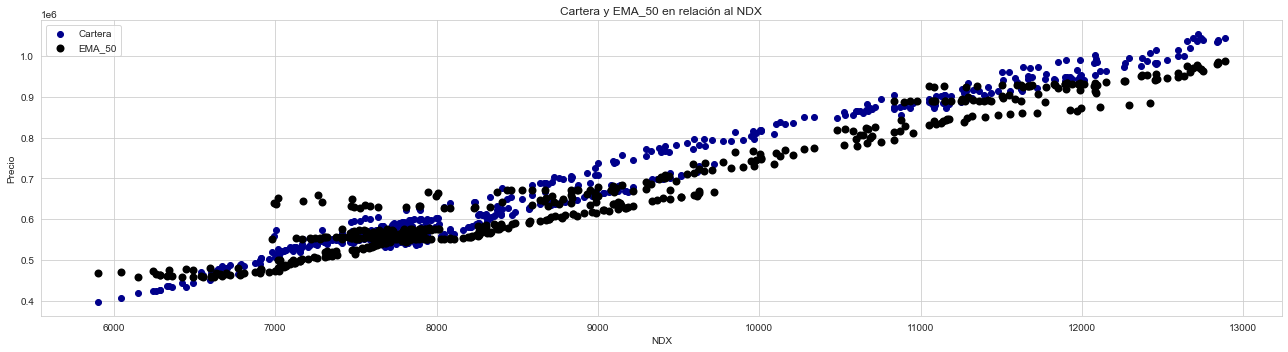

In [37]:
plt.figure(figsize=(18,5))

plt.scatter(Cartera['NDX'].iloc[2000:],Cartera['Cartera'].iloc[2000:],color='darkblue',linestyle='-',label='Cartera')
plt.scatter(Cartera['NDX'].iloc[2000:],Cartera['EMA_50'].iloc[2000:],label='EMA_50',linestyle='-',color='black',linewidth=2.0)

plt.legend()
plt.title("Cartera y EMA_50 en relación al NDX")
plt.xlabel("NDX")
plt.ylabel("Precio")
plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

In [38]:
new_index= ['NDX','NDX_EMA_50','dif_NDX','Cartera','EMA_50','dif']
Cartera= Cartera.reindex(new_index,axis=1)
Cartera.head()

Symbols,NDX,NDX_EMA_50,dif_NDX,Cartera,EMA_50,dif
NDX,,,,,,
2254.23,2254.23,2254.230000,0.000000,95740.00,95740.000000,0.000000
2251.46,2251.46,2254.121373,-2.661373,95982.11,95749.494510,232.615490
2270.40,2270.40,2254.759750,15.640250,97083.00,95801.788843,1281.211157
2277.51,2277.51,2255.651917,21.858083,97613.13,95872.821829,1740.308171
2276.70,2276.70,2256.477332,20.222668,97275.95,95927.846463,1348.103537


Text(0, 0.5, 'Cartera')

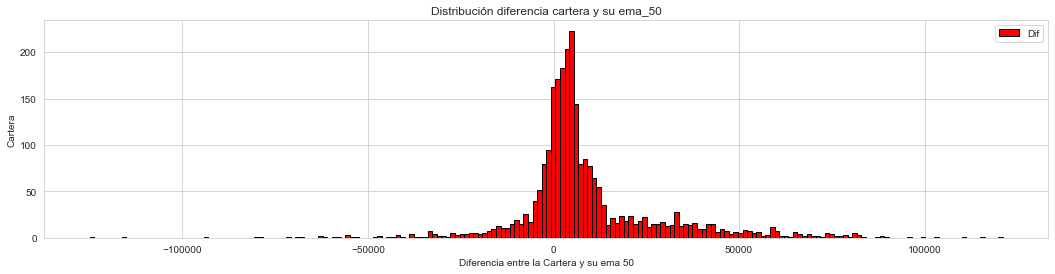

In [39]:
plt.figure(figsize=(18,4))

plt.hist(Cartera['dif'],bins=200,color='red',edgecolor='black',label="Dif")
plt.legend()
plt.title("Distribución diferencia cartera y su ema_50")
plt.xlabel("Diferencia entre la Cartera y su ema 50")
plt.ylabel("Cartera")

Text(0, 0.5, 'Distribución')

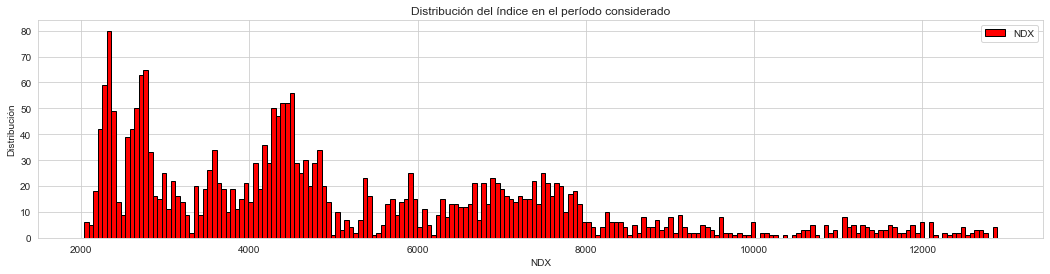

In [40]:
plt.figure(figsize=(18,4))

plt.hist(Cartera['NDX'],bins=200,color='red',edgecolor='black',label="NDX")
plt.legend()
plt.title("Distribución del índice en el período considerado")
plt.xlabel("NDX")
plt.ylabel("Distribución")

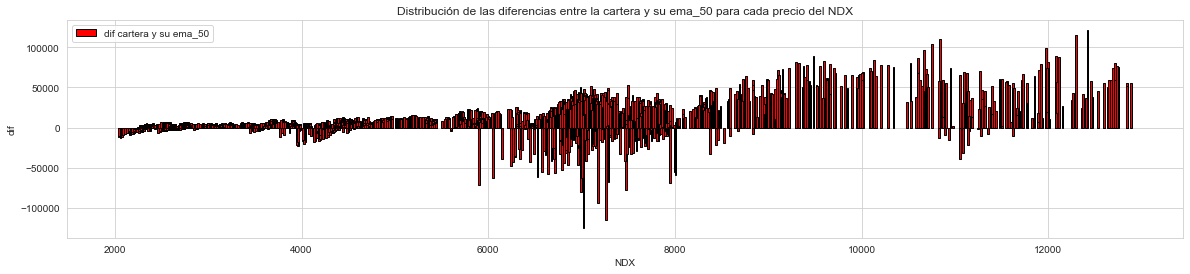

In [41]:
plt.figure(figsize=(20,4))

plt.bar(Cartera['NDX'],Cartera['dif'],width=20,color='red',edgecolor='black',label="dif cartera y su ema_50")

plt.legend()
#plt.xticks(ticks=TF.index,labels='NDX') #con esto logro que cada grupo de barras diga la edad a la q corresponde
plt.title("Distribución de las diferencias entre la cartera y su ema_50 para cada precio del NDX")
plt.xlabel("NDX")
plt.ylabel("dif")
plt.grid(True)
#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

### 2A.- Aplico REGRESIÓN LINEAL y mido su error con RSME, MAE, R-cuadrado y Score.
### 2B.- Aplico REGRESIÓN LINEAL MÚLTIPLE, agregando el feature 'dif21'
### 2C.- Aplico REGRESIÓN POLINOMIAL o no lineal, que modela la relación entre la variable dependiente y las variables independientes como un polinomio de orden n. Y mido su error con las mismas métricas.
### 2D.- Finalmente, COMPARO MÉTRICAS y determino qué modelo es el mejor para este dataset y según mi objetivo.
### CONCLUSIONES (comparación de métricas de los diversos modelos y elección del 'mejor')

# 2A Regresión Lineal:

### Tomo como variable independiente el precio del índice 'NDX' y como dependiente la columna 'Cartera'

### Al df Cartera, lo reduzco de la siguiente manera:

In [42]:
Cartera2A= Cartera.iloc[:,[0,3]]
Cartera2A.head()

Symbols,NDX,Cartera
NDX,,
2254.23,2254.23,95740.00
2251.46,2251.46,95982.11
2270.40,2270.40,97083.00
2277.51,2277.51,97613.13
2276.70,2276.70,97275.95


### Estandarizo la data

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_standard = scaler.fit_transform(Cartera2A)

In [44]:
datos_standard = pd.DataFrame(datos_standard, columns= Cartera2A.columns)
datos_standard.head()

Symbols,NDX,Cartera
0,-1.176185,-0.895953
1,-1.177309,-0.894911
2,-1.169626,-0.890173
3,-1.166742,-0.887892
4,-1.167070,-0.889343


In [45]:
# Preparo los datos para el modelo
X= datos_standard.iloc[:,:-1].values
y= datos_standard.iloc[:,1].values

In [46]:
# Empiezo a crear el modelo con la importación del mismo de la librería y asignando 80% a train y 20% a test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# fiteo -entreno- el modelo con los datos de train Uso el método fit() de la clase LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
# Recupero la intersección de la recta sobre x=0
round(regressor.intercept_,3)

0.001

In [49]:
# Recupero la pendiente de la recta
regressor.coef_

array([0.98230878])

In [50]:
# Hago las predicciones
y_pred= np.round(regressor.predict(X_test),3)
y_pred

array([-0.64 , -0.326, -0.96 , -0.448,  1.603, -0.433, -0.474,  0.82 ,
        0.104,  0.254, -0.982, -0.423, -1.151, -0.935, -0.941, -0.974,
        0.464, -0.901,  0.506, -0.264, -0.3  ,  0.514,  0.721, -0.238,
       -0.76 , -0.604, -0.971, -0.809, -0.289, -0.305, -0.423,  2.699,
       -1.1  ,  0.93 , -0.   , -0.368, -1.023, -0.203, -1.   , -0.35 ,
       -0.968, -1.007,  1.237,  0.089,  0.312,  2.878, -0.074, -1.069,
       -0.504,  0.108,  1.984,  0.273, -0.194,  1.283,  0.979, -0.91 ,
       -0.495,  1.003,  0.501, -0.993,  2.76 , -0.337,  2.52 , -0.419,
       -1.182,  0.588,  0.925, -0.704,  0.177,  0.112,  0.24 , -0.074,
        0.863, -1.097,  0.19 ,  0.775,  2.387, -0.393,  0.338, -1.119,
       -0.25 ,  0.189, -0.861,  2.437, -0.117, -0.926, -1.003, -0.764,
       -0.988,  0.709,  1.154,  0.94 ,  0.764,  1.072,  0.084,  2.618,
       -0.289, -1.169,  2.265, -0.701,  0.663,  0.619, -0.541,  0.363,
        1.739, -0.434, -0.877, -1.179, -0.826,  0.079, -1.156,  0.956,
      

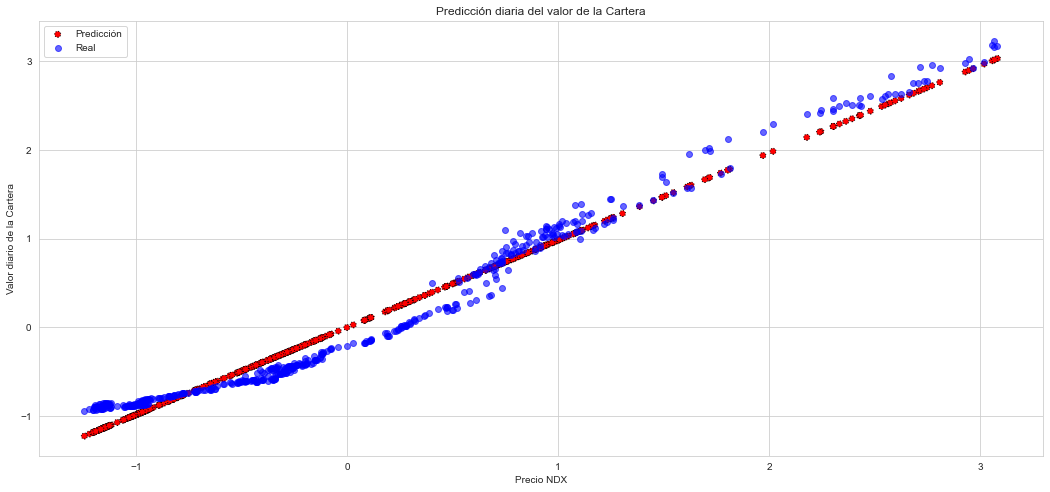

In [51]:
plt.figure(figsize=(18,8))
plt.scatter(X_test,y_pred,color='red',edgecolor='black',linewidth=1,linestyle='dotted',label='Predicción')
plt.scatter(X_test,y_test,color='blue',label='Real',alpha=0.6)

plt.legend()
plt.title("Predicción diaria del valor de la Cartera")
plt.ylabel("Valor diario de la Cartera")
plt.xlabel("Precio NDX")

#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

Text(0, 0.5, 'Cartera')

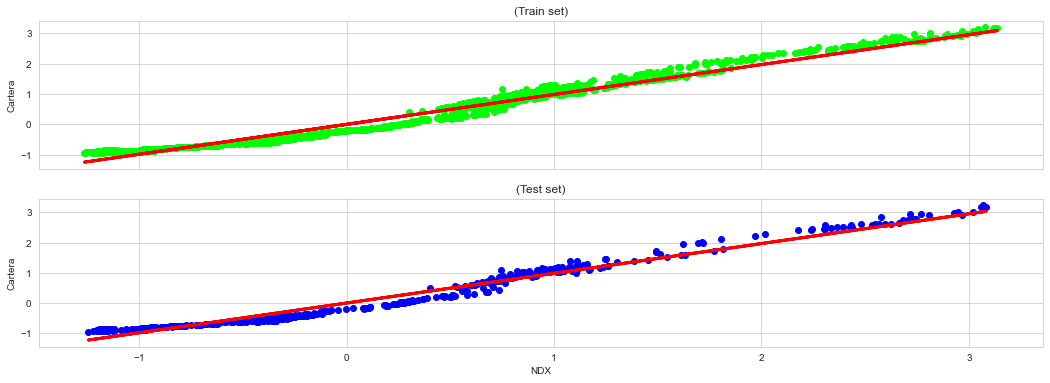

In [52]:
#Visualizo los resultados del training set
fig,(ax1,ax2)= plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(18,6))

ax1.scatter(X_train,y_train,color='lime')
ax1.plot(X_train,regressor.predict(X_train),color='red',linewidth=3)

ax2.scatter(X_test,y_test,color='blue')
ax2.plot(X_test,regressor.predict(X_test),color='red',linewidth=3)

ax1.set_title('(Train set)')

ax2.set_title('(Test set)')
ax2.set_xlabel('NDX')
ax1.set_ylabel('Cartera')
ax2.set_ylabel('Cartera')

In [53]:
# Con la salida predicha armo un data frame
newCartera2A= pd.DataFrame({'Real':y_test,'Predicción':y_pred})
newCartera2A

,Real,Predicción
0,-0.688690,-0.640
1,-0.442401,-0.326
2,-0.827754,-0.960
3,-0.600936,-0.448
4,1.574323,1.603
...,...,...
499,0.278464,0.571
500,-0.921239,-1.145
501,-0.943789,-1.222
502,2.122644,1.772


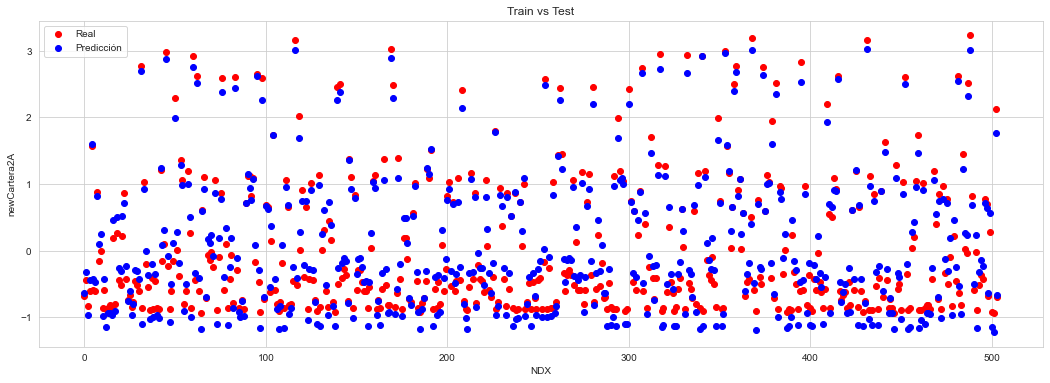

In [54]:
# Visualizo los datos de la predicción
fig,ax= plt.subplots(figsize=(18,6))

ax.scatter(newCartera2A.index,newCartera2A['Real'],color='red', label='Real')
# ax.plot(X_test,regressor.predict(X_test),)

ax.scatter(newCartera2A.index,newCartera2A['Predicción'],color='blue', label='Predicción')
# ax.plot(X_test,regressor.predict(X_train),)

ax.set_title('Train vs Test')
ax.legend()
ax.set_xlabel('NDX')
ax.set_ylabel('newCartera2A')
plt.show()

In [55]:
# Importo las tres métricas más comúnmente utilizadas en este tipo de algoritmo
from sklearn import metrics
Result2A_MAE= round(metrics.mean_absolute_error(y_test,y_pred),4)
print('Mean Absolute Error:',Result2A_MAE)
Result2A_R2= round(metrics.mean_squared_error(y_test,y_pred),5)
print('Mean Squared Error:',Result2A_R2)
Result2A_RMSE= round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4)
print('Root Mean Squared Error:',Result2A_RMSE)

Mean Absolute Error: 0.1546
Mean Squared Error: 0.03101
Root Mean Squared Error: 0.1761


In [56]:
Result2As_SCORE=round(regressor.score(X_train,y_train),4)
print('Presición del modelo:',Result2As_SCORE)

Presición del modelo: 0.9694


# 2B: Regresión Lineal MÚLTIPLE

### Tomamos como variables independientes las columnas calculadas 'ema_50' y 'ema_21' (médias móviles exponenciales, ema por sus siglas en inglés, de 50 y 21 períodos respectivamente)

In [57]:
Cartera.head()

Symbols,NDX,NDX_EMA_50,dif_NDX,Cartera,EMA_50,dif
NDX,,,,,,
2254.23,2254.23,2254.230000,0.000000,95740.00,95740.000000,0.000000
2251.46,2251.46,2254.121373,-2.661373,95982.11,95749.494510,232.615490
2270.40,2270.40,2254.759750,15.640250,97083.00,95801.788843,1281.211157
2277.51,2277.51,2255.651917,21.858083,97613.13,95872.821829,1740.308171
2276.70,2276.70,2256.477332,20.222668,97275.95,95927.846463,1348.103537


In [58]:
Cartera['EMA_21']= Cartera.loc[:,'Cartera'].ewm(span=21, adjust=False).mean()
Cartera.head()

Symbols,NDX,NDX_EMA_50,dif_NDX,Cartera,EMA_50,dif,EMA_21
NDX,,,,,,,
2254.23,2254.23,2254.230000,0.000000,95740.00,95740.000000,0.000000,95740.000000
2251.46,2251.46,2254.121373,-2.661373,95982.11,95749.494510,232.615490,95762.010000
2270.40,2270.40,2254.759750,15.640250,97083.00,95801.788843,1281.211157,95882.100000
2277.51,2277.51,2255.651917,21.858083,97613.13,95872.821829,1740.308171,96039.466364
2276.70,2276.70,2256.477332,20.222668,97275.95,95927.846463,1348.103537,96151.873967


### Al df Cartera, lo reduzco de la siguiente manera:

In [59]:
Cartera2B= Cartera.iloc[:,[0,3,4,6]]
Cartera2B.head()

Symbols,NDX,Cartera,EMA_50,EMA_21
NDX,,,,
2254.23,2254.23,95740.00,95740.000000,95740.000000
2251.46,2251.46,95982.11,95749.494510,95762.010000
2270.40,2270.40,97083.00,95801.788843,95882.100000
2277.51,2277.51,97613.13,95872.821829,96039.466364
2276.70,2276.70,97275.95,95927.846463,96151.873967


### Estandarizo la data

In [60]:
datos_standard_multi = scaler.fit_transform(Cartera2B)
datos_standard_multi = pd.DataFrame(datos_standard_multi, columns= Cartera2B.columns)
datos_standard_multi.head()

Symbols,NDX,Cartera,EMA_50,EMA_21
0,-1.176185,-0.895953,-0.898502,-0.897510
1,-1.177309,-0.894911,-0.898459,-0.897413
2,-1.169626,-0.890173,-0.898224,-0.896886
3,-1.166742,-0.887892,-0.897904,-0.896195
4,-1.167070,-0.889343,-0.897656,-0.895702


### Chequeo que no haya NaN, ya que verifiqué en varias oportunidades que luego de estandarizar aparecen.


In [61]:
datos_standard_multi.isnull().sum()

Symbols
NDX        0
Cartera    0
EMA_50     0
EMA_21     0
dtype: int64

In [62]:
# Preparo los datos para el modelo
X_multi= datos_standard_multi.iloc[:,:-1].values
y_multi= datos_standard_multi.iloc[:,3].values

In [63]:
# Empiezo a crear el modelo con la importación del mismo de la librería y asignando el 80% a train y el 20% a test
from sklearn.model_selection import train_test_split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)

In [64]:
# Fiteo -entreno- el modelo con los datos de train Usao el método fit() de la clase LinearRegression
from sklearn.linear_model import LinearRegression
regressor_multi = LinearRegression()
regressor_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [65]:
# Recupero la intersección de la recta sobre el x=0
round(regressor_multi.intercept_,4)

0.0001

In [66]:
# Recupero la pendiente de la recta
regressor_multi.coef_

array([0.00341673, 0.36228764, 0.63497039])

In [67]:
# Hago las predicciones
y_pred_multi= np.round(regressor_multi.predict(X_test_multi),3)
y_pred_multi

array([-0.677, -0.409, -0.824, -0.595,  1.524, -0.593, -0.613,  0.82 ,
       -0.16 , -0.041, -0.864, -0.585, -0.882, -0.868, -0.823, -0.866,
        0.22 , -0.802,  0.245, -0.452, -0.525,  0.237,  0.817, -0.427,
       -0.748, -0.667, -0.87 , -0.778, -0.459, -0.54 , -0.595,  2.653,
       -0.871,  1.157, -0.224, -0.561, -0.887, -0.411, -0.881, -0.442,
       -0.866, -0.885,  1.198, -0.152,  0.095,  2.974, -0.257, -0.899,
       -0.612, -0.144,  2.149,  0.004, -0.388,  1.299,  1.154, -0.812,
       -0.61 ,  1.183,  0.24 , -0.871,  2.874, -0.436,  2.56 , -0.606,
       -0.914,  0.6  ,  1.143, -0.73 , -0.03 , -0.141, -0.013, -0.255,
        1.023, -0.908, -0.111,  0.866,  2.754, -0.589,  0.104, -0.859,
       -0.437, -0.078, -0.798,  2.505, -0.309, -0.867, -0.886, -0.754,
       -0.88 ,  0.694,  1.143,  1.144,  0.918,  1.128, -0.175,  2.59 ,
       -0.482, -0.918,  2.372, -0.737,  0.634,  0.776, -0.646,  0.123,
        1.657, -0.591, -0.8  , -0.886, -0.789, -0.175, -0.863,  1.183,
      

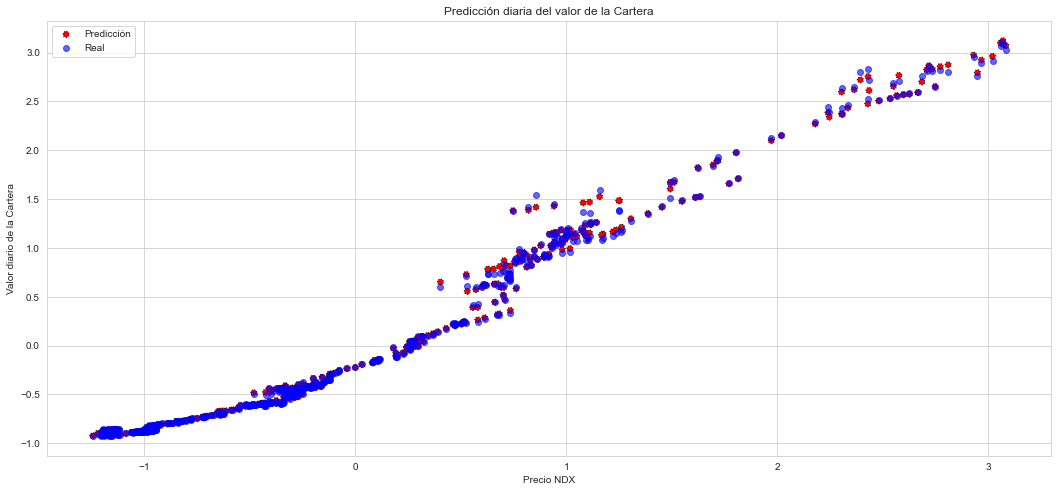

In [68]:
plt.figure(figsize=(18,8))
plt.scatter(X_test_multi[:,0],y_pred_multi,color='red',edgecolor='black',linewidth=1,linestyle='dotted',label='Predicción')
plt.scatter(X_test_multi[:,0],y_test_multi,color='blue',label='Real',alpha=0.6)

plt.legend()
plt.title("Predicción diaria del valor de la Cartera")
plt.ylabel("Valor diario de la Cartera")
plt.xlabel("Precio NDX")

#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

Text(0, 0.5, 'Cartera')

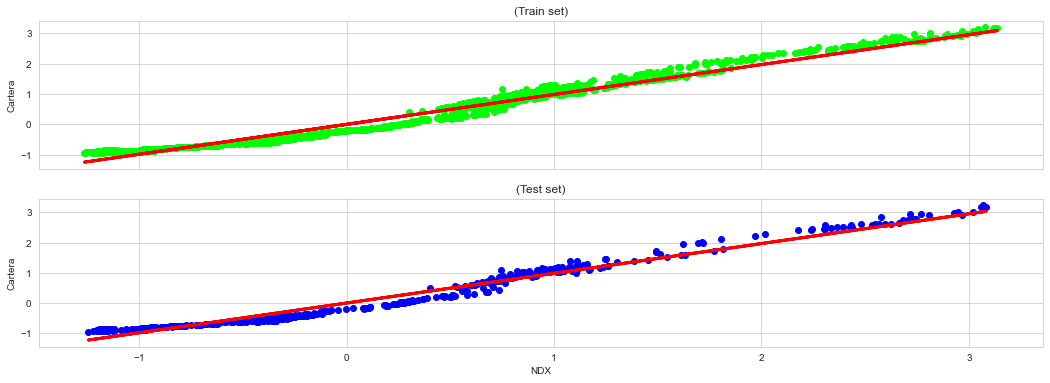

In [69]:
#Visualizo los resultados del training set
fig,(ax1,ax2)= plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(18,6))

ax1.scatter(X_train_multi[:,0],y_train,color='lime')
ax1.plot(X_train_multi[:,0],regressor.predict(X_train),color='red',linewidth=3)

ax2.scatter(X_test_multi[:,0],y_test,color='blue')
ax2.plot(X_test_multi[:,0],regressor.predict(X_test),color='red',linewidth=3)

ax1.set_title('(Train set)')

ax2.set_title('(Test set)')
ax2.set_xlabel('NDX')
ax1.set_ylabel('Cartera')
ax2.set_ylabel('Cartera')

In [70]:
# Con la salida predicha armo un data frame
newCartera2B= pd.DataFrame({'Real':y_test,'Predicción':y_pred})
newCartera2B

,Real,Predicción
0,-0.688690,-0.640
1,-0.442401,-0.326
2,-0.827754,-0.960
3,-0.600936,-0.448
4,1.574323,1.603
...,...,...
499,0.278464,0.571
500,-0.921239,-1.145
501,-0.943789,-1.222
502,2.122644,1.772


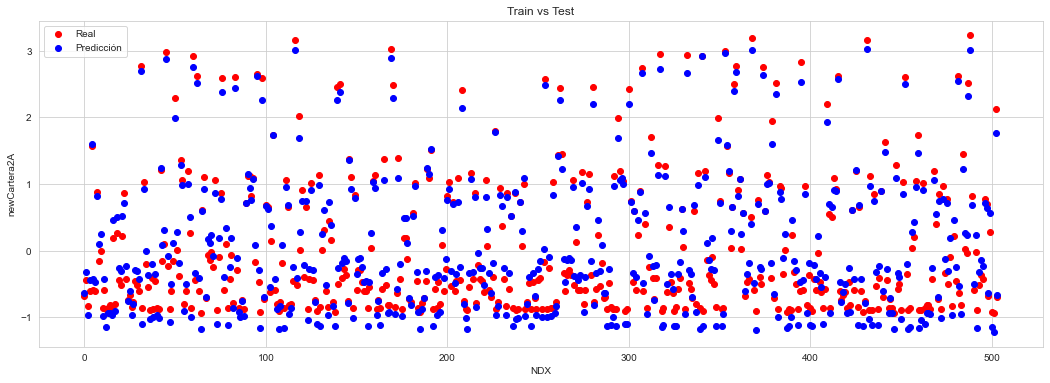

In [71]:
# Visualizo los resultados de la predicción
fig,ax= plt.subplots(figsize=(18,6))

ax.scatter(newCartera2B.index,newCartera2B['Real'],color='red', label='Real')
# ax.plot(X_test,regressor.predict(X_test),)

ax.scatter(newCartera2B.index,newCartera2B['Predicción'],color='blue', label='Predicción')
# ax.plot(X_test,regressor.predict(X_train),)

ax.set_title('Train vs Test')
ax.legend()
ax.set_xlabel('NDX')
ax.set_ylabel('newCartera2A')
plt.show()

In [72]:
# Importamos las tres métricas más comúnmente utilizadas en este tipo de algoritmo
from sklearn import metrics
Result2B_MAE=round(metrics.mean_absolute_error(y_test_multi,y_pred_multi),4)
Result2B_R2=round(metrics.mean_squared_error(y_test_multi,y_pred_multi),4)
Result2B_RMSE=round(np.sqrt(metrics.mean_squared_error(y_test_multi,y_pred_multi)),4)
print('Mean Absolute Error:',Result2B_MAE)
print('Mean Squared Error:',Result2B_R2)
print('Root Mean Squared Error:',Result2B_RMSE)

Mean Absolute Error: 0.0118
Mean Squared Error: 0.0005
Root Mean Squared Error: 0.0214


### Aquí vemos que el error, en cualquiera de sus formas de medirlo, es sustancialmente más bajo que en la regresión lineal para este dataset.

In [73]:
a=regressor_multi.score(X_train_multi,y_train_multi)
b=round(a,4)
print('Presición del modelo:',b)

Presición del modelo: 0.9996


# 2C: Regresión POLINOMIAL o NO LINEAL

### Tomamos como variable independiente el precio del índice 'NDX' y como dependiente la columna 'Cartera'
### El polinomio tendrá un grado n y n-1 cantidad de curvas
### Cuanto más grande n, mayor libertad tiene el modelo para capturar cambios no lineales en los datos y más cerca está de la sobreoptimización u overfitting.

### En este caso, ya parto del df estandarizado

In [74]:
datos_standard.head()

Symbols,NDX,Cartera
0,-1.176185,-0.895953
1,-1.177309,-0.894911
2,-1.169626,-0.890173
3,-1.166742,-0.887892
4,-1.167070,-0.889343


In [75]:
# Preparo los datos para el modelo
X_pol= datos_standard.iloc[:,:-1].values
y_pol= datos_standard.iloc[:,1].values

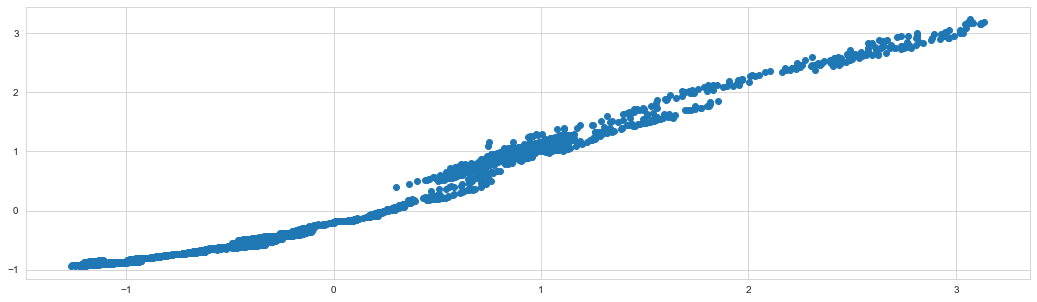

In [76]:
plt.figure(figsize=(18,5))
plt.scatter(X_pol,y_pol)
plt.show()

In [77]:
# Empiezo a crear el modelo con la importación del mismo de la librería y asignando el 80% a train y el 20% a test
from sklearn.model_selection import train_test_split
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X_pol, y_pol, test_size=0.2, random_state=0)

### Aquí importo de sklearn las características polinomiales o polynomial features.
### Y defino el grado del polinomio.

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poli_reg= PolynomialFeatures(degree=8)

### Aquí transformo las características existentes, X_train_pol y X_test_pol, en características de mayor grado, según el polinomio definido en el paso anterior y lo entreno con estos datos. Solo las X.

In [79]:
X_train_p= poli_reg.fit_transform(X_train_pol)
X_test_p= poli_reg.fit_transform(X_test_pol)

### Elijo el algoritmo

In [80]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
pr= linear_model.LinearRegression()

### Entreno el modelo con la y definida y la X potenciada.

In [81]:
pr.fit(X_train_p,y_train_pol)

LinearRegression()

In [82]:
Y_pred_pr= np.round(pr.predict(X_test_p),3)
Y_pred_pr

array([-0.671, -0.5  , -0.85 , -0.57 ,  1.744, -0.562, -0.584,  0.861,
       -0.127,  0.058, -0.86 , -0.557, -0.892, -0.837, -0.84 , -0.856,
        0.352, -0.818,  0.413, -0.461, -0.484,  0.424,  0.723, -0.443,
       -0.737, -0.652, -0.855, -0.765, -0.477, -0.488, -0.557,  2.812,
       -0.896,  1.007, -0.24 , -0.525, -0.877, -0.418, -0.868, -0.515,
       -0.853, -0.871,  1.368, -0.145,  0.137,  2.927, -0.311, -0.891,
       -0.6  , -0.123,  2.154,  0.085, -0.411,  1.417,  1.07 , -0.823,
       -0.595,  1.099,  0.406, -0.865,  2.847, -0.507,  2.697, -0.554,
       -0.88 ,  0.533,  1.   , -0.705, -0.039, -0.118,  0.04 , -0.311,
        0.919, -0.895, -0.023,  0.8  ,  2.586, -0.54 ,  0.172, -0.896,
       -0.451, -0.025, -0.795,  2.63 , -0.349, -0.832, -0.87 , -0.739,
       -0.863,  0.706,  1.277,  1.02 ,  0.784,  1.183, -0.15 ,  2.763,
       -0.477, -0.886,  2.466, -0.704,  0.641,  0.577, -0.619,  0.208,
        1.886, -0.563, -0.805, -0.882, -0.775, -0.155, -0.891,  1.041,
      

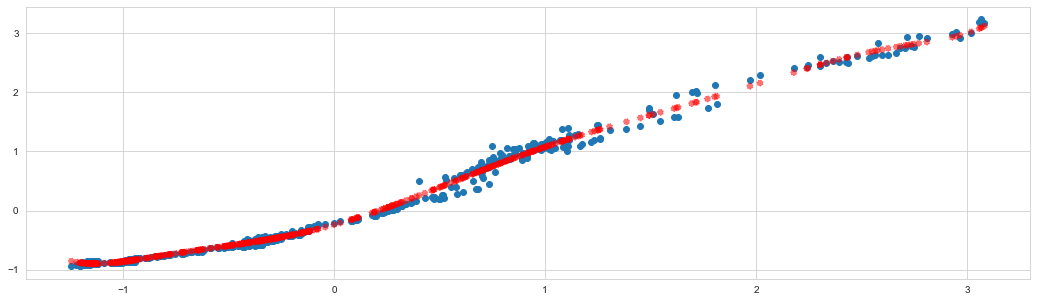

In [83]:
plt.figure(figsize=(18,5))
plt.scatter(X_test_pol,y_test_pol)
plt.scatter(X_test_pol,Y_pred_pr,color='red',linestyle='dotted',alpha=0.55)
plt.show()

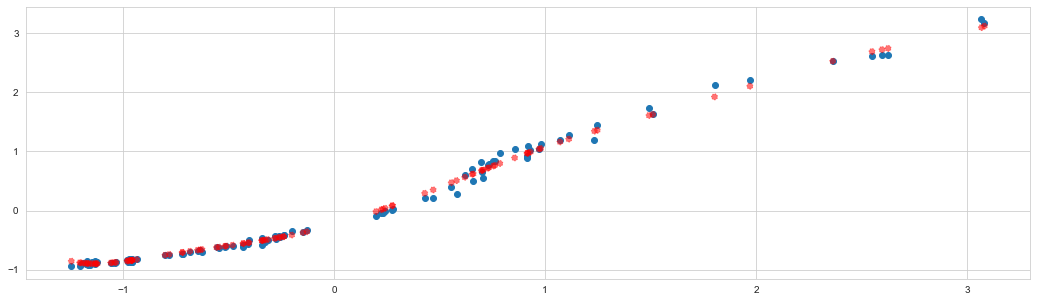

In [84]:
plt.figure(figsize=(18,5))
plt.scatter(X_test_pol[-100:],y_test_pol[-100:])
plt.scatter(X_test_pol[-100:],Y_pred_pr[-100:],color='red',linestyle='dotted',alpha=0.55)
plt.show()

### Calculo la diferencia entre cada predicción y su valor real, y el nivel de acierto de cada predicción.

In [85]:
ver=pd.DataFrame(X_test_pol,Y_pred_pr)
cabecera=['Y_pred_pr']
ver.columns=cabecera
ver.index.name='NDXs'
ver['dif']=ver.index-ver['Y_pred_pr']
ver['acierto']=1+ver['dif']
ver['y_test_pol']=y_test_pol
ver

,Y_pred_pr,dif,acierto,y_test_pol
NDXs,,,,
-0.671,-0.651988,-0.019012,0.980988,-0.688690
-0.500,-0.332639,-0.167361,0.832639,-0.442401
-0.850,-0.978341,0.128341,1.128341,-0.827754
-0.570,-0.456935,-0.113065,0.886935,-0.600936
1.744,1.630712,0.113288,1.113288,1.574323
...,...,...,...,...
0.507,0.580423,-0.073423,0.926577,0.278464
-0.893,-1.166279,0.273279,1.273279,-0.921239
-0.854,-1.244817,0.390817,1.390817,-0.943789


In [86]:
new_index= ['y_test_pol','Y_pred_pr','dif','acierto']
ver= ver.reindex(new_index,axis=1)
ver.head()


,y_test_pol,Y_pred_pr,dif,acierto
NDXs,,,,
-0.671,-0.688690,-0.651988,-0.019012,0.980988
-0.500,-0.442401,-0.332639,-0.167361,0.832639
-0.850,-0.827754,-0.978341,0.128341,1.128341
-0.570,-0.600936,-0.456935,-0.113065,0.886935
1.744,1.574323,1.630712,0.113288,1.113288


In [87]:
round(ver['dif'].max(),3)

0.391

In [88]:
ver['dif'].argmax()

501

In [89]:
ver.iloc[501]

y_test_pol   -0.943789
Y_pred_pr    -1.244817
dif           0.390817
acierto       1.390817
Name: -0.854, dtype: float64

In [90]:
# Máxima dif:
ver['dif'].idxmax()

-0.854

In [91]:
ver.loc[-0.854]

,y_test_pol,Y_pred_pr,dif,acierto
NDXs,,,,
-0.854,-0.871015,-0.986045,0.132045,1.132045
-0.854,-0.943789,-1.244817,0.390817,1.390817


In [92]:
round(ver['acierto'].min(),3)

0.761

In [93]:
ver['dif'].iloc[501]

0.3908170746703118

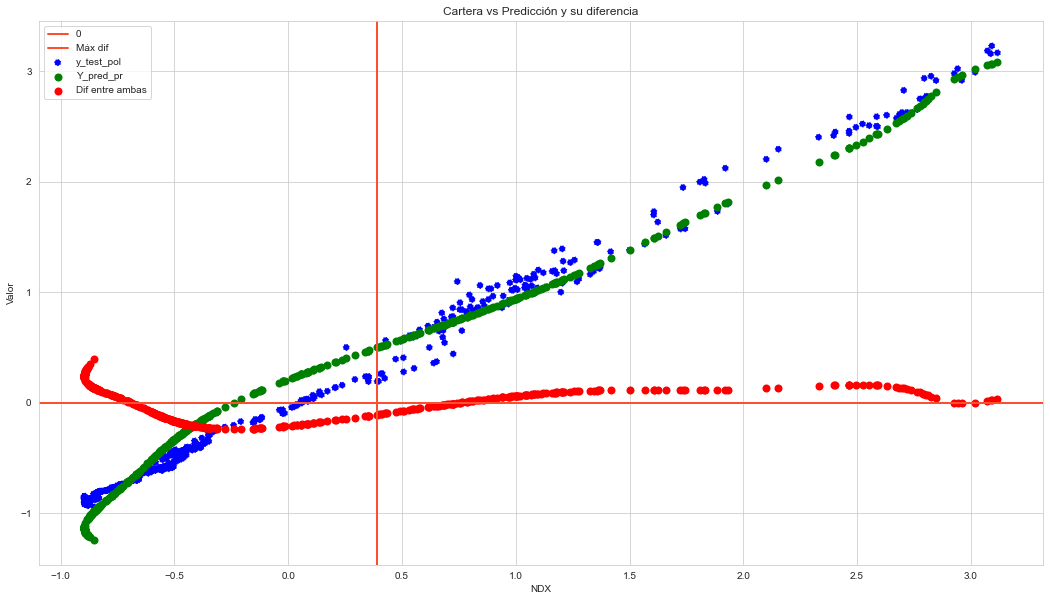

In [94]:
fig,ax1=plt.subplots(figsize=(18,10))

ax1.scatter(ver.index,ver['y_test_pol'],color='blue',linestyle='dotted',label='y_test_pol')
ax1.scatter(ver.index,ver['Y_pred_pr'],linewidth=2.0, color='green',label='Y_pred_pr')
ax1.scatter(ver.index,ver['dif'],linewidth=2.0, color='red',label='Dif entre ambas')
med=0
plt.axhline(med,color='#fc4f30',label='0',linewidth=2)
max=ver['dif'].iloc[501]
plt.axvline(max,color='#fc4f30',label='Máx dif',linewidth=2)

ax1.legend()
ax1.set_title("Cartera vs Predicción y su diferencia")
ax1.set_ylabel("Valor")
ax1.set_xlabel("NDX")

#plt.tight_layout() #ajusta el tamaño al área sin que se sobre-escriba la info
plt.show()

In [95]:

print()
print('DATOS DEL MODELO DE REGRESIÓN POLINOMIAL')
print()
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)


DATOS DEL MODELO DE REGRESIÓN POLINOMIAL

Valor de la pendiente o coeficiente "a":
[ 0.          0.99658806  0.6643132  -0.07134047 -0.47122849  0.11822995
  0.14283225 -0.07614844  0.01037092]


In [96]:
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

Valor de la intersección o coeficiente "b":
-0.23903875307586483


In [97]:
print('Precisión del modelo:')
Result2C_SCORE=round(pr.score(X_train_p,y_train_pol),4)
print(Result2C_SCORE)

Precisión del modelo:
0.9948


# CONCLUSIONES:

### Compraro los resultados y determino cuál es el mejor algoritmo para este dataset, según las métricas de error y de score.

In [98]:
print('1ra COMPARACIÓN con objetivo llegar a 0:')
print('2A LINEAL:  ', 'MAE',Result2A_MAE, 'R2',Result2A_R2, 'RMSE',Result2A_RMSE)
print('2B MÚLTIPLE:', 'MAE',Result2B_MAE, 'R2',Result2B_R2, 'RMSE',Result2B_RMSE)
print()
print('2da COMPARACIÓN con objetivo llegar a 1:')
print('2A LINEAL     según score:', Result2As_SCORE)
print('2C POLINÓMICA según score:', Result2C_SCORE)

1ra COMPARACIÓN con objetivo llegar a 0:
2A LINEAL:   MAE 0.1546 R2 0.03101 RMSE 0.1761
2B MÚLTIPLE: MAE 0.0118 R2 0.0005 RMSE 0.0214

2da COMPARACIÓN con objetivo llegar a 1:
2A LINEAL     según score: 0.9694
2C POLINÓMICA según score: 0.9948


### De la 1ra comparación entre 2A y 2B, surge unánime ganador, aunque por un pequeño margen: 2B -Regresión Lineal Múltiple- es superior para este dataset
### De la 2da comparación entre 2A y 2C, surge como ganador para este dataset, el algoritmo de Regresión Polinómica.

## Como se desprende de los gráficos realizados, la curva de la cartera no es lineal.
## El algoritmo elegido finalmente es la REGRESIÓN POLINÓMICA con un score de 0.9948